In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [38]:
filenames = ["B00K8K937I_Puritan'sPrideSuperStrengthRapidReleaseCapsules Melatonin.csv",
             "B01MAWIGWT_Zarbee'sKids1mgMelatoninGummy.csv",
             "B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets.csv",
             "B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies.csv",
             "B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements.csv",
             "B07VMJMZNP_NatrolKidsMelatoninGummy.csv",
             "B08CGYFB2Q_VitamaticMelatonin20mgTablets.csv",
             "B079TD7HG2_NatrolMelatoninSleepAidGummy.csv",
             "B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets.csv"]
dfs = []

# Looping and concatenating files
for filename in filenames:
    path = r"C:\Users\samhi\Downloads\\" + filename
    combined_df = pd.read_csv(path)
    dfs.append(combined_df)

df = pd.concat(dfs)

In [39]:
df.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I


In [40]:
df.tail()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
755,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,LUCI BATES,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,They taste and work great!!!! Fall asleep pret...,NaN,They work Great!!!!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/RVU...,B08451719W
756,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Precola,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,They weren’t the best tasting. But they worked...,NaN,Tastes gross,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R2E...,B08451719W
757,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Ashley McCann Apostle,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,I usually buy the Puritans Pride 10mg capsules...,NaN,Don't work for me,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R31...,B08451719W
758,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Sharper Shopper,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,Works like a charm. Great sleep!!!,NaN,Works like a charm,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R6D...,B08451719W
759,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,JW,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,"The flavor is great, you could chew it if you ...",NaN,This works to relax you and to help you sleep.,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/RSA...,B08451719W


In [41]:
df.shape

(20050, 22)

In [42]:
df.dtypes

asin                             object
product_title                    object
average_rating                  float64
total_reviews                     int64
review_author                    object
author_badge                     object
badge                            object
reviewed_product_attribute       object
reviewed_variant_asin            object
variant_review_url               object
review_rating                   float64
review_date                      object
reviewed_country                 object
review_text                      object
review_comment_count            float64
review_header                    object
no_of_people_reacted_helpful     object
author_profile_url               object
url                              object
brand                            object
review_url                       object
input                            object
dtype: object

In [43]:
df.describe()

,average_rating,total_reviews,review_rating,review_comment_count
count,20050.000000,20050.000000,20050.000000,0.0
mean,4.605935,3771.212968,4.227431,NaN
std,0.093425,1967.406168,1.349919,NaN
min,4.500000,768.000000,1.000000,NaN
25%,4.500000,2749.000000,4.000000,NaN
50%,4.600000,3273.000000,5.000000,NaN
75%,4.700000,5151.000000,5.000000,NaN
max,4.800000,6594.000000,5.000000,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 0 to 759
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   asin                          20050 non-null  object 
 1   product_title                 20050 non-null  object 
 2   average_rating                20050 non-null  float64
 3   total_reviews                 20050 non-null  int64  
 4   review_author                 20050 non-null  object 
 5   author_badge                  116 non-null    object 
 6   badge                         19586 non-null  object 
 7   reviewed_product_attribute    17953 non-null  object 
 8   reviewed_variant_asin         17953 non-null  object 
 9   variant_review_url            17953 non-null  object 
 10  review_rating                 20050 non-null  float64
 11  review_date                   20050 non-null  object 
 12  reviewed_country              20050 non-null  object 
 13  rev

In [45]:
print("Number of rows:", len(df))
print("Number of unique products:", len(df["asin"].unique()))
print("Average rating:", np.mean(df["average_rating"]))
print("Average number of reviews per product:", np.mean(df.groupby("asin")["total_reviews"].count()))

Number of rows: 20050
Number of unique products: 9
Average rating: 4.6059351620945455
Average number of reviews per product: 2227.777777777778


In [46]:
df.isna().sum()

asin                                0
product_title                       0
average_rating                      0
total_reviews                       0
review_author                       0
author_badge                    19934
badge                             464
reviewed_product_attribute       2097
reviewed_variant_asin            2097
variant_review_url               2097
review_rating                       0
review_date                         0
reviewed_country                    0
review_text                        27
review_comment_count            20050
review_header                       2
no_of_people_reacted_helpful    16698
author_profile_url                  0
url                                 0
brand                               0
review_url                          0
input                               0
dtype: int64

In [47]:
def impute_missing_values(df):
    null_cols = df.columns[df.isnull().any()]
    
    for col in null_cols:
        if df[col].dtype == np.number:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

    return df

imputed_df = impute_missing_values(df)
print(imputed_df)


           asin                                      product_title  \
0    B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
1    B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
2    B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
3    B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
4    B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
..          ...                                                ...   
755  B08451719W  Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...   
756  B08451719W  Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...   
757  B08451719W  Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...   
758  B08451719W  Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...   
759  B08451719W  Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...   

     average_rating  total_reviews          review_author author_badge  \
0               4.6           3273              Thomas B.   VINE VOICE   
1          

C:\Users\samhi\AppData\Local\Temp\ipykernel_14604\2087916146.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:
C:\Users\samhi\AppData\Local\Temp\ipykernel_14604\2087916146.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:
C:\Users\samhi\AppData\Local\Temp\ipykernel_14604\2087916146.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:
C:\Users\samhi\AppData\Local\Temp\ipykernel_14604\2087916146.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:


In [48]:
df.isna().sum()

asin                                0
product_title                       0
average_rating                      0
total_reviews                       0
review_author                       0
author_badge                        0
badge                               0
reviewed_product_attribute          0
reviewed_variant_asin               0
variant_review_url                  0
review_rating                       0
review_date                         0
reviewed_country                    0
review_text                         0
review_comment_count            20050
review_header                       0
no_of_people_reacted_helpful        0
author_profile_url                  0
url                                 0
brand                               0
review_url                          0
input                               0
dtype: int64

In [49]:
# dropping column "review_comment_count" as it has all null values
df = df.drop('review_comment_count', axis='columns')
df.head()

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_date,reviewed_country,review_text,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,"May 02, 2021",United States,"These works great, I think the gel capsule dis...",Max dose and it hits faster than other quick r...,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"May 11, 2022",United States,Powerful! Will knock you right out!,Powerful!,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,"May 10, 2021",United States,"Best melatonin I've tried,so much better then ...",Amazing,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"April 20, 2017",United States,"Works like a charm, great price.",Five Stars,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"August 18, 2020",United States,"I love this product, I use it to sleep at nigh...","This is one great product, people should try it.",1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I


In [50]:
df.isna().sum()

asin                            0
product_title                   0
average_rating                  0
total_reviews                   0
review_author                   0
author_badge                    0
badge                           0
reviewed_product_attribute      0
reviewed_variant_asin           0
variant_review_url              0
review_rating                   0
review_date                     0
reviewed_country                0
review_text                     0
review_header                   0
no_of_people_reacted_helpful    0
author_profile_url              0
url                             0
brand                           0
review_url                      0
input                           0
dtype: int64

In [51]:
df["product_title"].value_counts()

Carlyle Melatonin 12 mg Fast Dissolve 180 Tablets | Drug Free | Natural Berry Flavor | Vegetarian, Non-GMO, Gluten Free                                                          5000
Zarbee's Kids 1mg Melatonin Gummy, Drug-Free & Effective Sleep Supplement for Children Ages 3 and Up, Natural Berry Flavored Gummies, 50 Count                                   3250
Puritan's Pride Super Strength Rapid Release Capsules Melatonin 120 Count (Pack of 2)                                                                                            3200
Natrol Melatonin Sleep Aid Gummy, Fall Asleep Faster, Stay Asleep Longer, 2 Gummies Per Serving, Drug Free and Gelatin Free, 10mg, 90 Strawberry Flavored Gummies                2700
vitafusion Max Strength Melatonin Gummy Supplements, Strawberry Flavored, 10 mg Melatonin Sleep Supplements, America’s Number 1 Gummy Vitamin Brand, 50 Day Supply, 100 Count    1950
ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies, Helps You Fall Asleep Naturally, Wildberry 

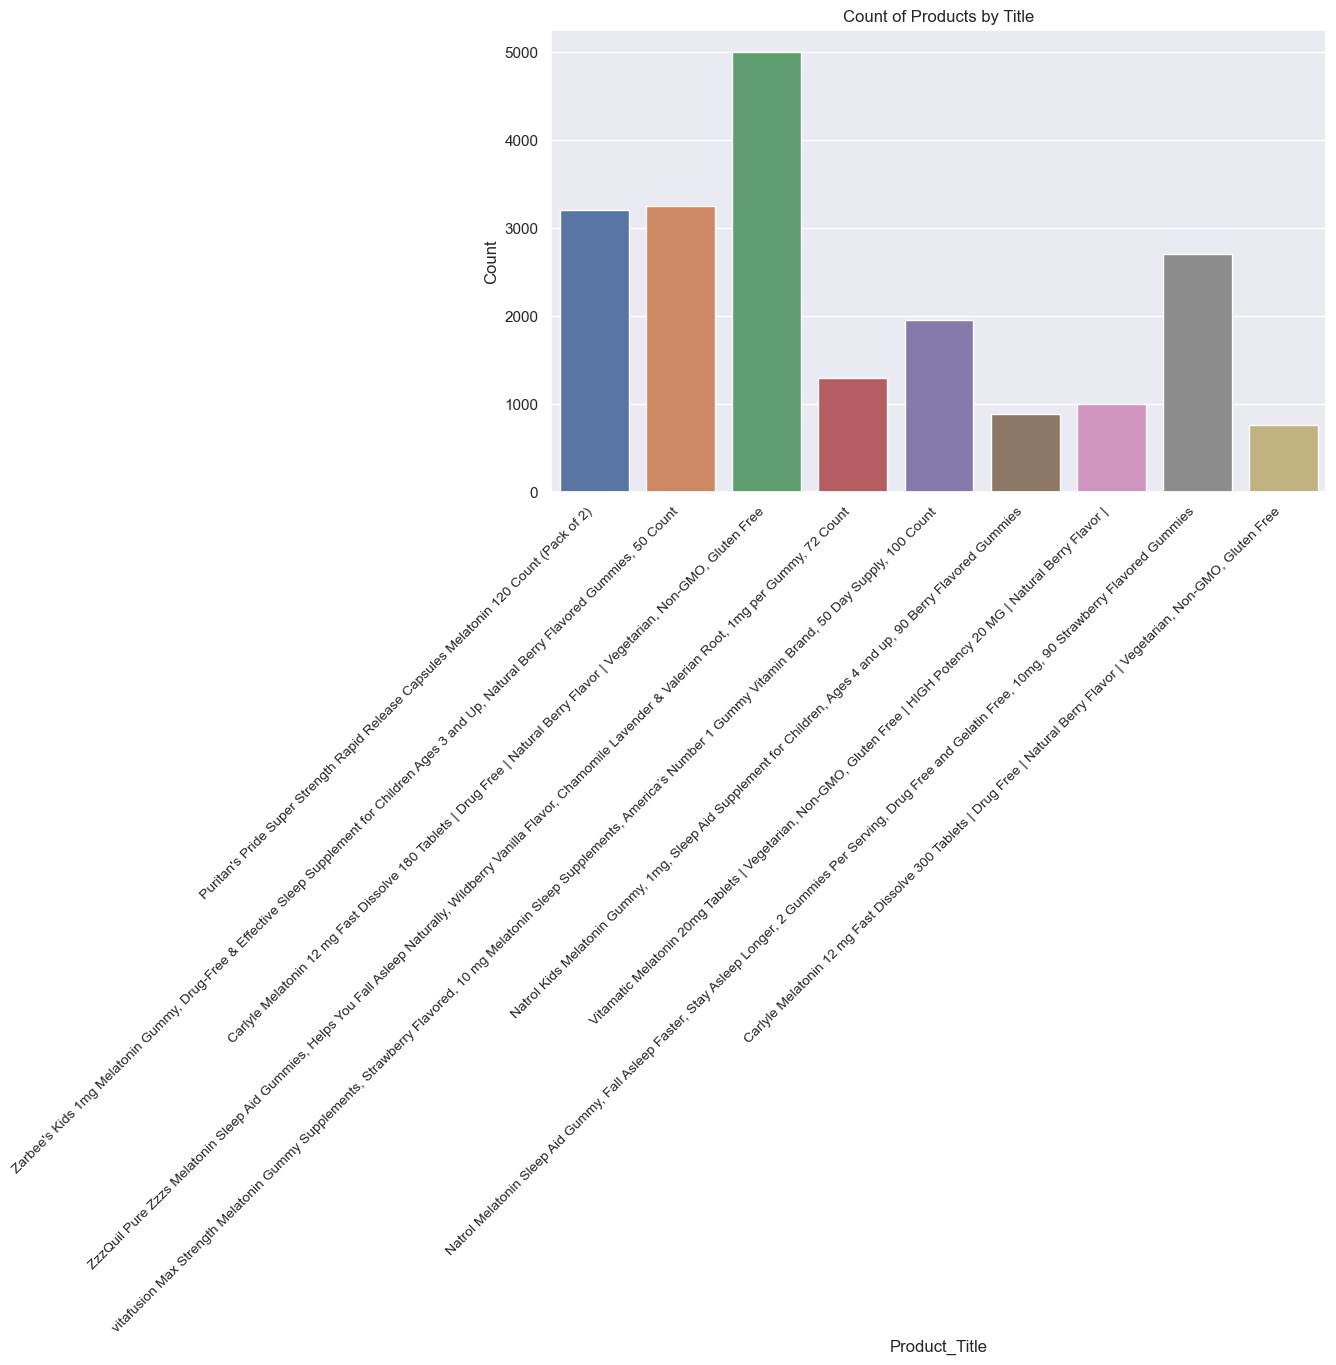

In [52]:
#Countplot to visualize the count of each category in the product_title column.
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="product_title")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
plt.title("Count of Products by Title")
plt.ylabel("Count")
plt.xlabel("Product_Title")
plt.show()


In [53]:
# function to extract the melatonin dose from the product title
def extract_dose(product_title):
    dose1 = product_title.str.extract('(\d+) mg')
    dose2 = product_title.str.extract('(\d+)mg')
    dose = dose1.fillna(dose2)
    return dose.astype(float)

df['dose'] = extract_dose(df['product_title'])
df.loc[df['product_title'] == "Puritan's Pride Super Strength Rapid Release Capsules Melatonin 120 Count (Pack of 2)", 'dose'] = 10

dose_proportions = df.groupby('dose').size() / len(df)

In [54]:
df

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,dose
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"These works great, I think the gel capsule dis...",Max dose and it hits faster than other quick r...,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I,10.0
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,Powerful! Will knock you right out!,Powerful!,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I,10.0
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Best melatonin I've tried,so much better then ...",Amazing,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I,10.0
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Works like a charm, great price.",Five Stars,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I,10.0
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"I love this product, I use it to sleep at nigh...","This is one great product, people should try it.",1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,LUCI BATES,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,United States,They taste and work great!!!! Fall asleep pret...,They work Great!!!!,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/RVU...,B08451719W,12.0
756,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Precola,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,United States,They weren’t the best tasting. But they worked...,Tastes gross,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R2E...,B08451719W,12.0
757,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Ashley McCann Apostle,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,United States,I usually buy the Puritans Pride 10mg capsules...,Don't work for me,1.0,https://w

In [55]:
df.reset_index(drop=True, inplace=True)

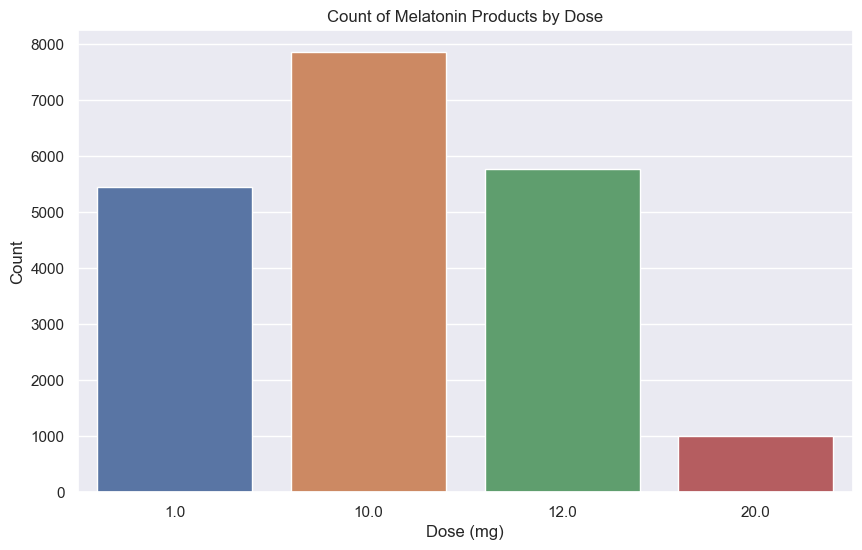

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dose')
plt.title('Count of Melatonin Products by Dose')
plt.xlabel('Dose (mg)')
plt.ylabel('Count')
plt.show()

In [76]:
def extract_age(product_title):
    if re.search(r'\bkids\b', product_title, re.IGNORECASE):
        return 'Kids'
    else:
        return 'Adults'

df['age_group'] = None

for i, row in df.iterrows():
    df.at[i, 'age_group'] = extract_age(row['product_title'])

In [77]:
# function to categorize the products by dose
def categorize_dose(dose):
    if dose <= 2:
        return "Low"
    elif dose <= 10:
        return "Medium"
    else:
        return "High"

df["dose_category"] = df["dose"].apply(categorize_dose)

In [78]:
df

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,dose,age_group,dose_category
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,Max dose and it hits faster than other quick r...,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I,10.0,Adults,Medium
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,Powerful!,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I,10.0,Adults,Medium
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,Amazing,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I,10.0,Adults,Medium
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,Five Stars,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I,10.0,Adults,Medium
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"This is one great product, people should try it.",1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I,10.0,Adults,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,LUCI BATES,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,They work Great!!!!,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/RVU...,B08451719W,12.0,Adults,High
20046,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Precola,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,Tastes gross,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R2E...,B08451719W,12.0,Adults,High
20047,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Ashley McCann Apostle,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,Don't work for me,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R31...,B08451719W,12.0,Adults,High
20048,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Sharper Shopper,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,Work

In [59]:
counts = df["age_group"].value_counts()
print(counts)

Adults    15910
Kids       4140
Name: age_group, dtype: int64


In [91]:
print("Number of doses available in the market:", len(df["dose"].unique()))
print("Average of dose available in market:", np.mean(df["dose"]))
print("Average dose per age group:", np.mean(df.groupby("age_group")["dose"].mean()))

Number of doses available in the market: 4
Average of dose available in market: 8.63142144638404
Average dose per age group: 5.808610936517913


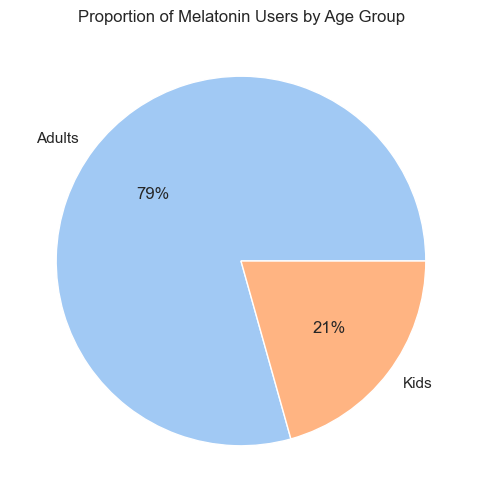

In [60]:
plt.figure(figsize=[6,6])
data = df["age_group"].value_counts(normalize=True)
labels = ["Adults","Kids"]
colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Melatonin Users by Age Group");

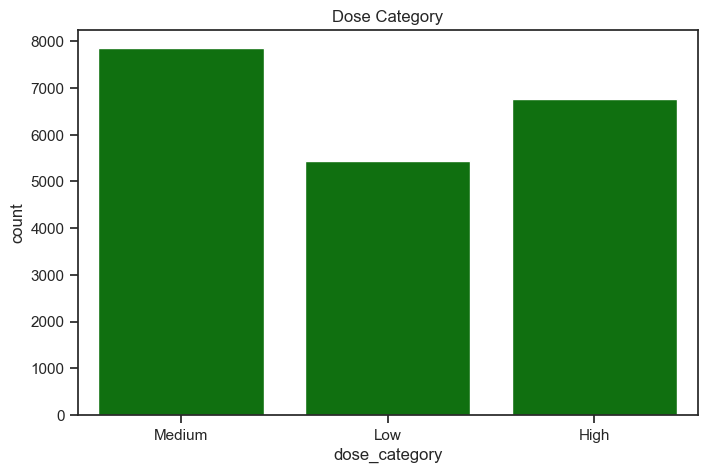

In [94]:
plt.figure(figsize=[8,5])
sns.countplot(data=df, x="dose_category", color="green")
plt.title("Dose Category")
plt.show()

In [61]:
df["dose"].describe()

count    20050.000000
mean         8.631421
std          5.122696
min          1.000000
25%          1.000000
50%         10.000000
75%         12.000000
max         20.000000
Name: dose, dtype: float64

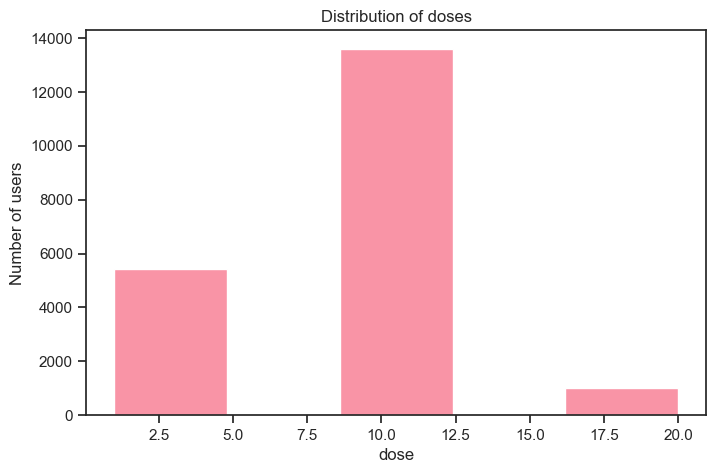

In [99]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="dose",bins=5).set(
    title="Distribution of doses",ylabel="Number of users");

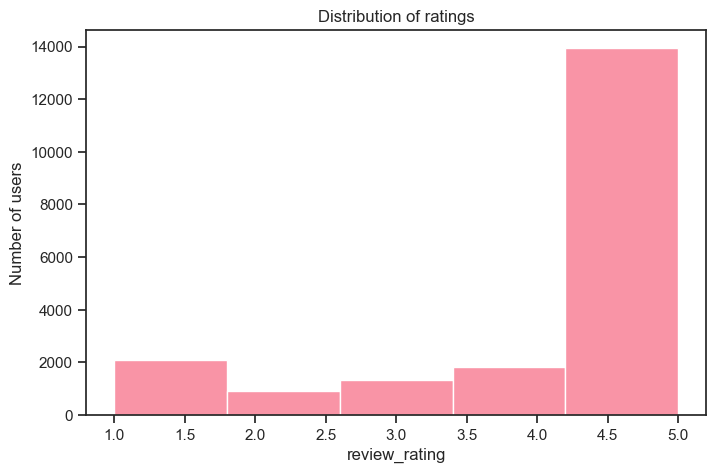

In [98]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="review_rating",bins=5).set(
    title="Distribution of ratings",ylabel="Number of users");

In [106]:
corr_matrix = df[["dose","total_reviews","review_rating"]].corr()
corr_matrix

,dose,total_reviews,review_rating
dose,1.000000,0.312514,-0.026516
total_reviews,0.312514,1.000000,0.025589
review_rating,-0.026516,0.025589,1.000000


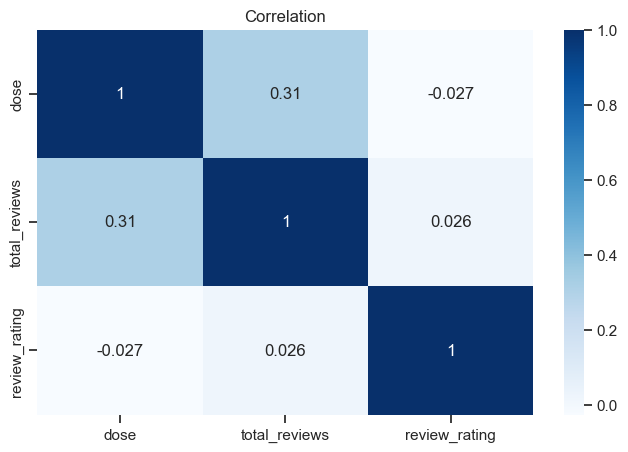

In [107]:
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix,annot=True,cmap='Blues')
plt.title("Correlation");

In [65]:
df.groupby('age_group')['dose'].mean()

age_group
Adults    10.617222
Kids       1.000000
Name: dose, dtype: float64

Text(0.5, 1.0, 'Distribution of Dose per Age group')

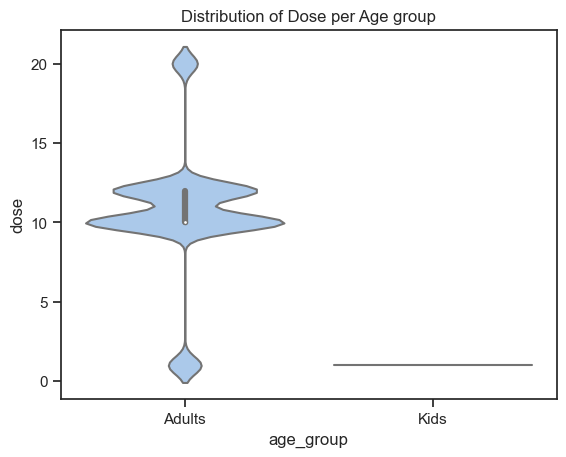

In [86]:
sns.violinplot(data=df, x='age_group', y='dose', palette='pastel')
plt.title("Distribution of Dose per Age group")

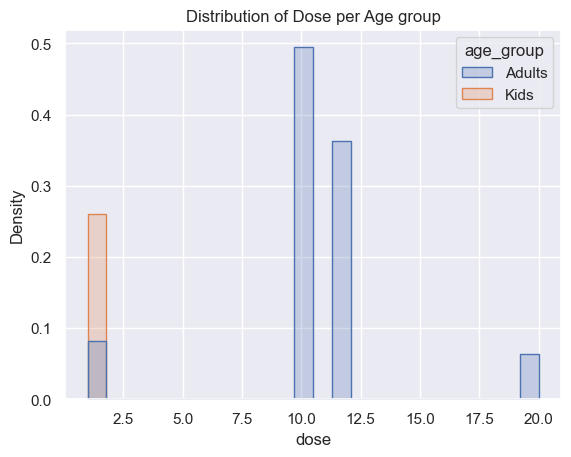

In [67]:
#histograms to compare distribution 
sns.histplot(df,x="dose",hue="age_group",element="step",stat="density")
plt.title("Distribution of Dose per Age group");

In [68]:
agedose = pd.pivot_table(data=df, index='brand', columns='age_group', values='dose', aggfunc='mean')
agedose.fillna(0, inplace=True)
agedose

age_group,Adults,Kids
brand,,
Carlyle,12.0,0.0
Natrol,10.0,1.0
Puritan's Pride,10.0,0.0
Vitafusion,10.0,0.0
Vitamatic,20.0,0.0
Zarbee's,0.0,1.0
ZzzQuil,1.0,0.0


Text(0.5, 1.0, 'Age and mean Dose by Brand')

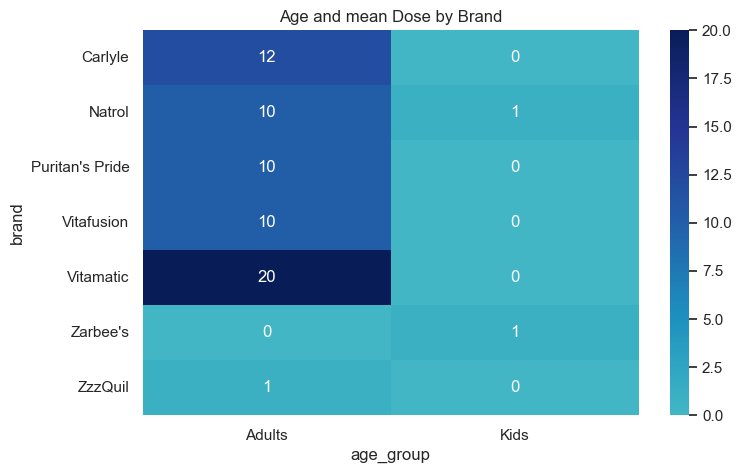

In [69]:
plt.figure(figsize=[8,5])
sns.heatmap(agedose,annot=True,cmap='YlGnBu',center=0.117)
plt.title("Age and mean Dose by Brand")

In [70]:
df

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,review_text,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input,dose,age_group
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,"These works great, I think the gel capsule dis...",Max dose and it hits faster than other quick r...,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I,10.0,Adults
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,Powerful! Will knock you right out!,Powerful!,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I,10.0,Adults
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,"Best melatonin I've tried,so much better then ...",Amazing,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I,10.0,Adults
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"Works like a charm, great price.",Five Stars,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I,10.0,Adults
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,VINE VOICE,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,"I love this product, I use it to sleep at nigh...","This is one great product, people should try it.",1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I,10.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,LUCI BATES,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,They taste and work great!!!! Fall asleep pret...,They work Great!!!!,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/RVU...,B08451719W,12.0,Adults
20046,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Precola,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,They weren’t the best tasting. But they worked...,Tastes gross,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R2E...,B08451719W,12.0,Adults
20047,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Ashley McCann Apostle,VINE VOICE,Verified Purchase,Size: 180 Count (Pack of 1),B07GR9WBFY,https://www.amazon.com/Carlyle-Melatonin-Disso...,...,I usually buy the Puritans Pride 10mg capsules...,Don't work for me,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/

Text(0.5, 1.0, 'Age and mean Rating by Dose Category')

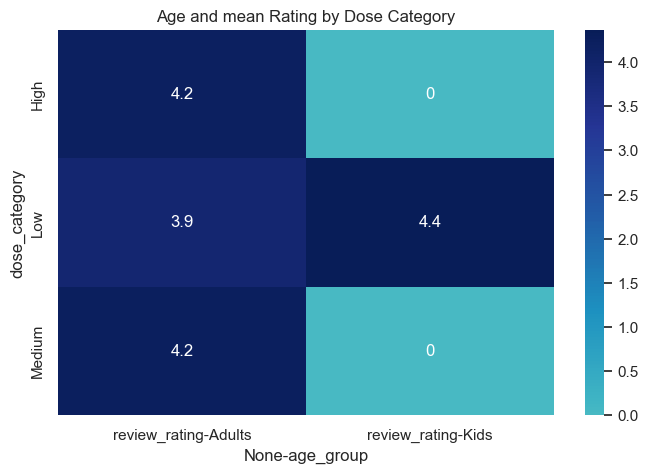

In [72]:
dosage = pd.pivot_table(df, index=["dose_category"], columns=["age_group"], values=["review_rating"], aggfunc="mean",fill_value= 0.0)
plt.figure(figsize=[8,5])
sns.heatmap(dosage,annot=True,cmap='YlGnBu',center=0.117)
plt.title("Age and mean Rating by Dose Category")

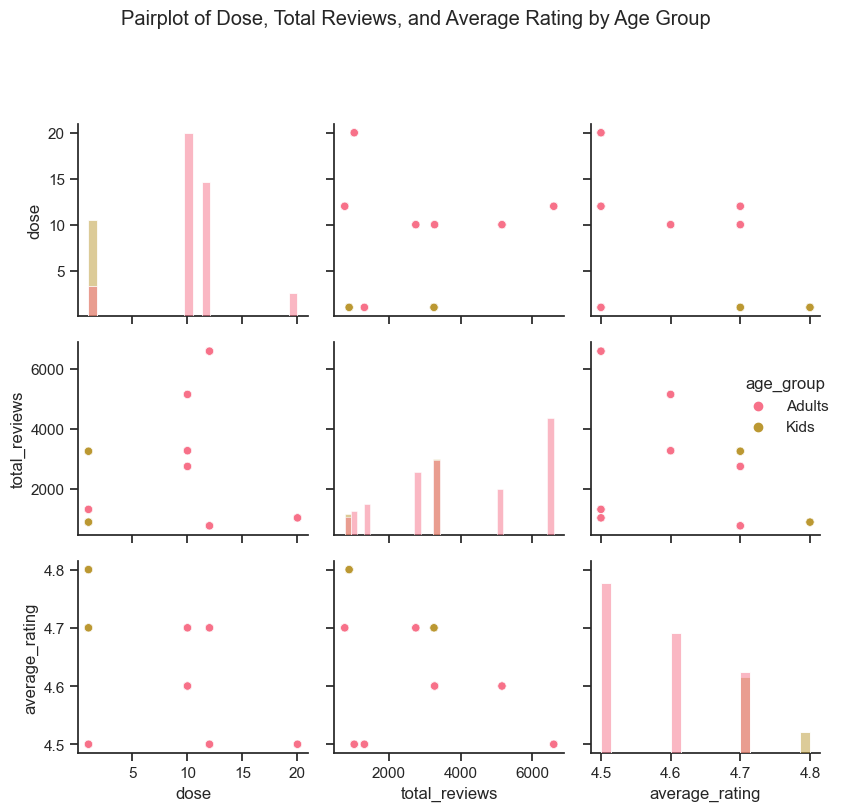

In [109]:
sns.set(style="ticks", palette="husl")
g = sns.pairplot(df, hue='age_group', vars=['dose', 'total_reviews', 'average_rating'], diag_kind='hist', height=2.5)
g.fig.suptitle("Pairplot of Dose, Total Reviews, and Average Rating by Age Group", y=1.08)
plt.tight_layout()
plt.show()